<a href="https://colab.research.google.com/github/zahrael97/COVID-19-detection-using-deep-Learning/blob/master/VGG/VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [0]:
# resize all the images to this
IMAGE_SIZE = [224,224]
train_path = "/content/drive/My Drive/Dataset_Zahra/train"
test_path = "/content/drive/My Drive/Dataset_Zahra/test"

In [0]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [0]:
  # useful for getting number of classes
folders = glob('/content/drive/My Drive/Dataset_Zahra/train/*')

In [0]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [17]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [19]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Dataset_Zahra/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Dataset_Zahra/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 317 images belonging to 2 classes.
Found 169 images belonging to 2 classes.


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [20]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
10/10 [==============================] - 104s 10s/step - loss: 0.7489 - accuracy: 0.7350 - val_loss: 0.1898 - val_accuracy: 0.8402
Epoch 2/30
10/10 [==============================] - 14s 1s/step - loss: 0.2171 - accuracy: 0.9338 - val_loss: 0.1416 - val_accuracy: 0.9763
Epoch 3/30
10/10 [==============================] - 15s 1s/step - loss: 0.1381 - accuracy: 0.9621 - val_loss: 0.0038 - val_accuracy: 0.9882
Epoch 4/30
10/10 [==============================] - 15s 1s/step - loss: 0.0951 - accuracy: 0.9779 - val_loss: 0.0225 - val_accuracy: 0.9882
Epoch 5/30
10/10 [==============================] - 15s 1s/step - loss: 0.0701 - accuracy: 0.9874 - val_loss: 8.8085e-04 - val_accuracy: 1.0000
Epoch 6/30
10/10 [==============================] - 15s 1s/step - loss: 0.0520 - accuracy: 0.9905 - val_loss: 0.0032 - val_accuracy: 0.9941
Epoch 7/30
10/10 [==============================] - 15s 1s/step - loss: 0.0457 - accuracy: 0.9905 - val_loss: 0.0571 - val_accuracy: 1.0000
Epoch 8/30
10/

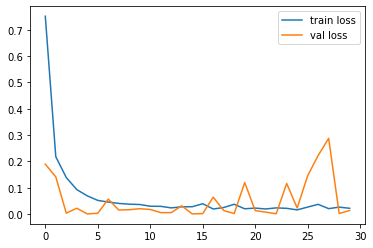

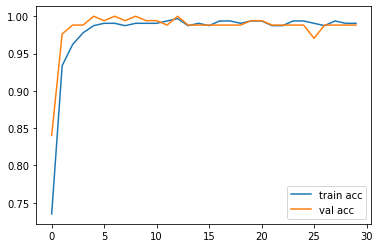

<Figure size 432x288 with 0 Axes>

In [21]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

import tensorflow as tf

from keras.models import load_model

model.save('VGG19.h5')